In [12]:
import random 
from typing import List
import numpy as np
import matplotlib.pyplot as plt 

In [13]:
def constraints(g, min_ = -10, max_ = 10):
    if max_ and g > max_:
        g = max_
    if min_ and g < min_:
        g = min_
    return g


In [14]:
def crossover_blend(g1, g2, alpha):
    shift = (1 + 2 * alpha) * random.random() - alpha
    new_g1 = (1 - shift) * g1 + shift * g2
    new_g2 = shift * g1 + (1 - shift) * g2

    return constraints(new_g1), constraints(new_g2)

In [15]:
def mutate_gaussian(g, mu, sigma):
    mutated_gene = g + random.gauss(mu, sigma)
    return constraints(mutated_gene)


In [16]:
def select_tournament(population, size):
    new_offspring = []
    for _ in range(len(population)):
        candidates = [random.choice(population) for _ in range(size)]
        new_offspring.append(max(candidates, key = lambda ind: ind.fitness))
    return new_offspring


In [17]:
def func(x):
    return np.sin(x) - .2 * abs(x)

In [18]:
def get_best(population):
    best = population[0]
    for ind in population:
        if ind.fitness > best.fitness:
            best = ind
    return best


In [19]:
def plot_population(population, number_of_population):
    best = get_best(population)
    x = np.linspace(-10, 10)
    plt.plot(x, func(x), '--', color = 'blue')
    plt.plot(
        [ind.get_gene() for ind in population],
        [ind.fitness for ind in population],
        'o', color = 'orange'
    )
    plt.plot([best.get_gene()], [best.fitness], 's', color = 'green')
    plt.title(f"Generation number {number_of_population}")
    plt.show()
    plt.close()


In [20]:
class Individual:

    def __init__(self, gene_list: List[float]) -> None:
        self.gene_list = gene_list
        self.fitness = func(self.gene_list[0])

    def get_gene(self):
        return self.gene_list[0]


In [21]:
def crossover(parent1, parent2):
    child1_gene, child2_gene = crossover_blend(parent1.get_gene(), parent2.get_gene(), 1)
    return Individual([child1_gene]), Individual([child2_gene])


def mutate(ind):
    mutated_gene = mutate_gaussian(ind.get_gene(), 0, 1)
    return Individual([mutated_gene])


def select(population):
    return select_tournament(population, size = 3)


def create_random():
    return Individual([random.uniform(-10, 10)])

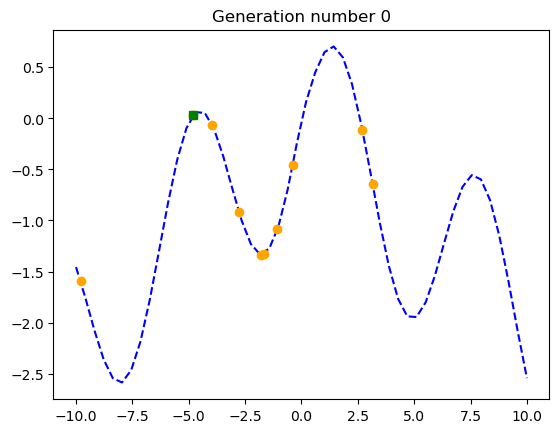

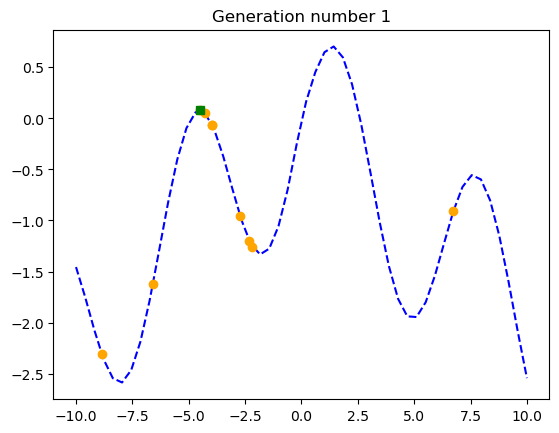

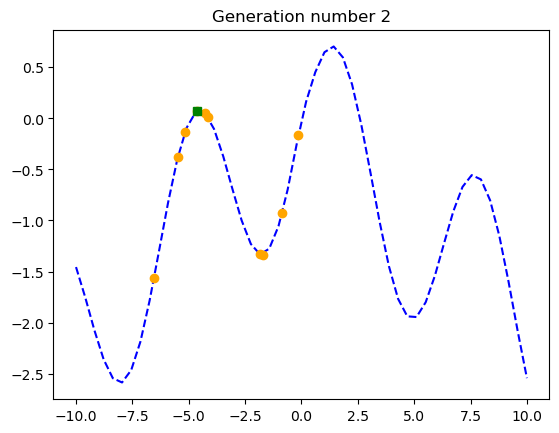

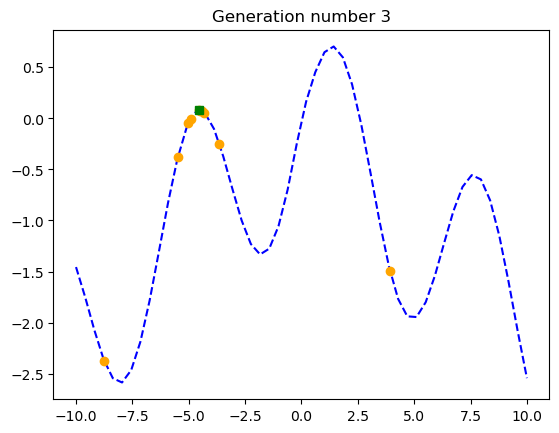

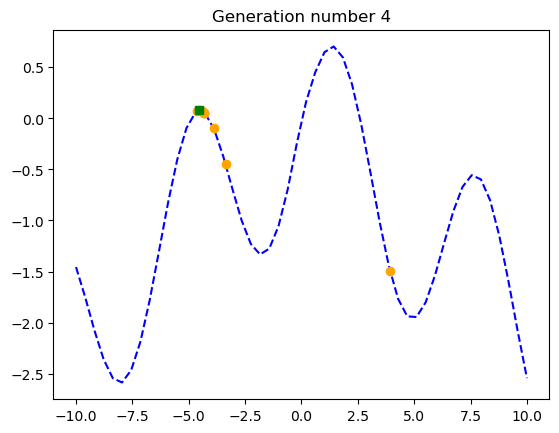

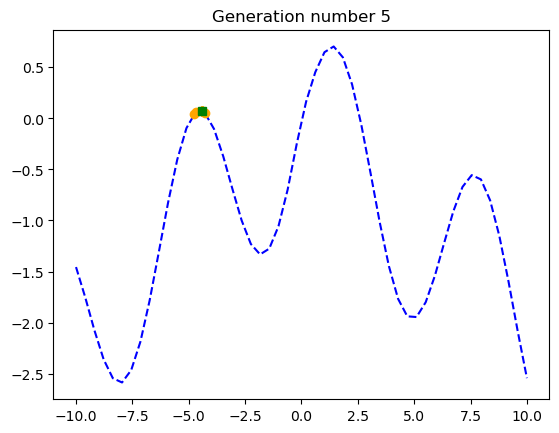

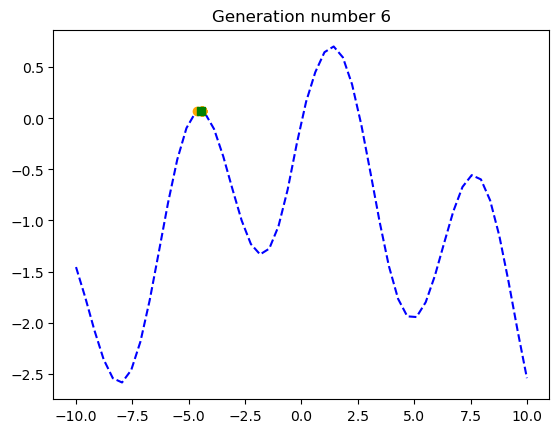

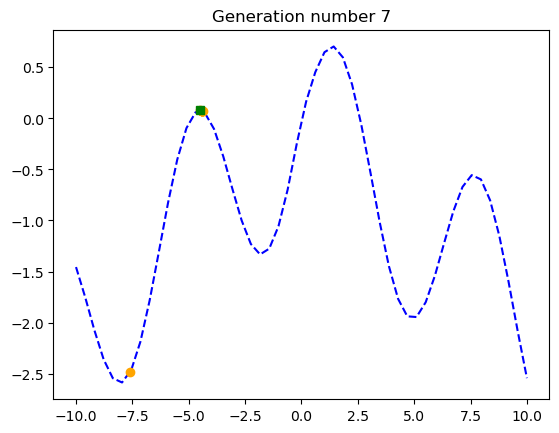

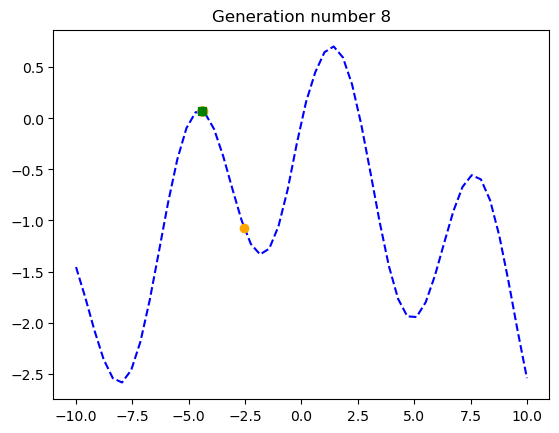

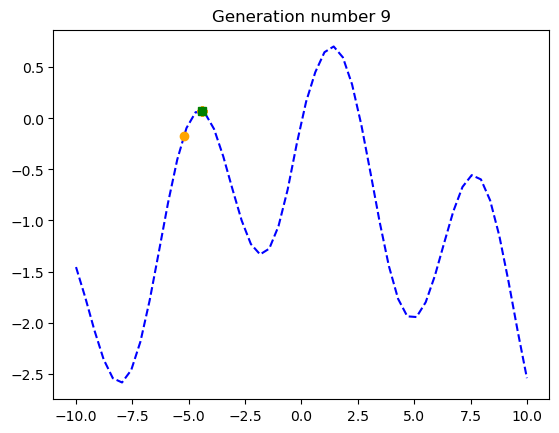

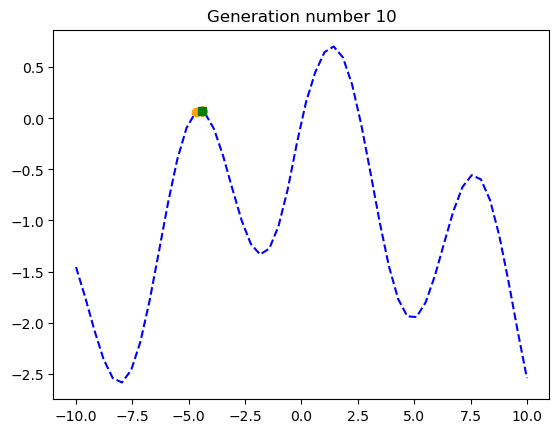

In [27]:
#random.seed(52)
random.seed(16)  # local maximum
POPULATION_SIZE = 10
CROSSOVER_PROBABILITY = .8
MUTATION_PROBABILITY = .1
MAX_GENERATIONS = 10

first_population = [create_random() for _ in range(POPULATION_SIZE)]
plot_population(first_population, 0)

generation_number = 0

population = first_population.copy()

while generation_number < MAX_GENERATIONS:

    generation_number += 1

    # SELECTION
    offspring = select(population)

    # CROSSOVER
    crossed_offspring = []
    for ind1, ind2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CROSSOVER_PROBABILITY:
            kid1, kid2 = crossover(ind1, ind2)
            crossed_offspring.append(kid1)
            crossed_offspring.append(kid2)
        else:
            crossed_offspring.append(ind1)
            crossed_offspring.append(ind2)

    # MUTATION
    mutated_offspring = []
    for mutant in crossed_offspring:
        if random.random() < MUTATION_PROBABILITY:
            new_mutant = mutate(mutant)
            mutated_offspring.append(new_mutant)
        else:
            mutated_offspring.append(mutant)

    population = mutated_offspring.copy()

    plot_population(population, generation_number)

In [28]:
x = [random.uniform(-10, 10)]

In [29]:
x

[-3.03726753209677]

In [32]:
def fitness(x): 
    return np.sin(x)  - .2 * np.abs(x)


print(fitness(x))

[-0.71158949]
